In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()
import datetime as dt
import numpy as np
from metpy.units import units
import pandas as pd
import glob
import rioxarray as rix


In [23]:
files = sorted(glob.glob("/Users/elischwat/Downloads/20230517_*.tif"))
files = files[7:9]

In [24]:
#collecting datasets when looping over your files
list_da = []

for path in files:
    #path = "tifs/DTSLOS_20170122_20190828_D79H_2017-02-15T06:13:38Z.tif"
    da = rix.open_rasterio(path)

    time = path[-17:-4]
    # tstamp = dt.datetime.strptime(time,"%Y%m%d_%H%M")
    # tstamp = pd.to_datetime(tstamp)

    da = da.assign_coords(time = tstamp)
    da = da.expand_dims(dim="time")
    da = da.isel(band=0)
    da = da.drop_vars(['band', 'spatial_ref'])
    list_da.append(da)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_28659/2034051044.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


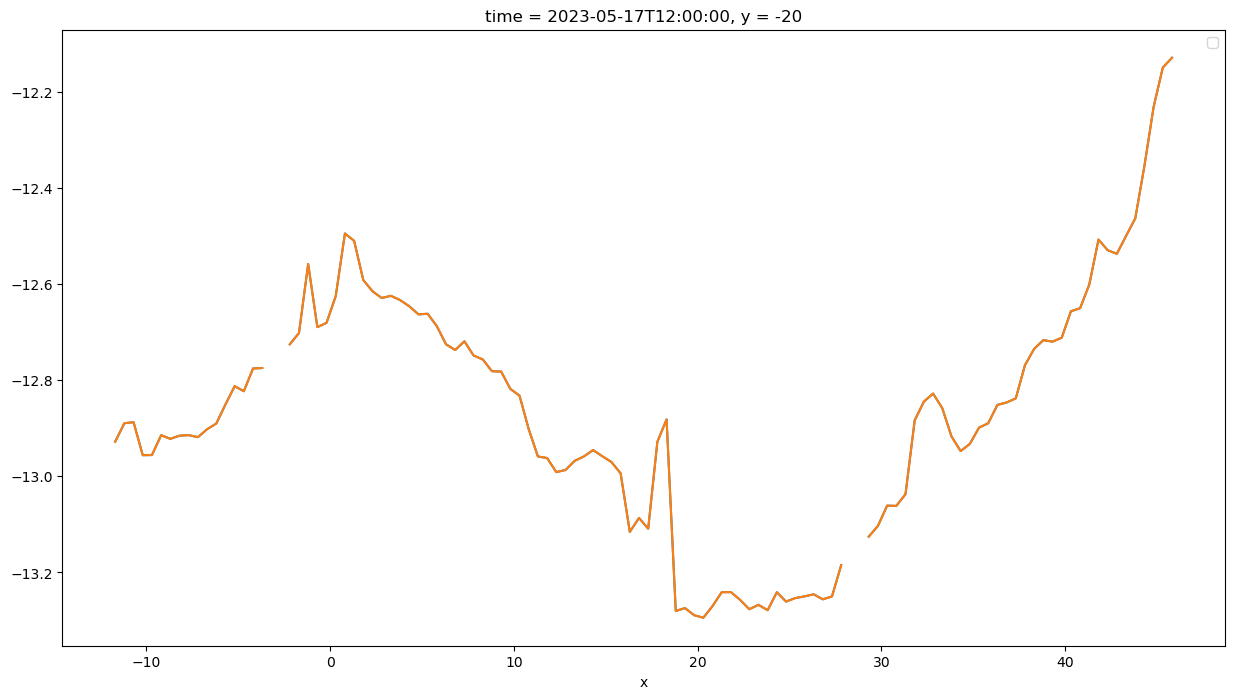

In [25]:
plt.figure(figsize=(15,8))

list_da[0].isel(time=0).interp(y=-20).plot()
list_da[1].isel(time=0).interp(y=-20).plot()
# list_da[2].isel(time=0).interp(y=-20).plot()
# list_da[3].isel(time=0).interp(y=-20).plot()
# list_da[4].isel(time=0).interp(y=-20).plot()
# list_da[5].isel(time=0).interp(y=-20).plot()
plt.legend()

In [ ]:
(
    dataset.sel(time = dataset.time[-1])
    - dataset.sel(time = dataset.time[0])
).plot(vmin=-2, vmax=0, cmap='Reds_r', cbar_kwargs={'label': 'Elevation change (m)'})
plt.title('Lidar (L2) Elevation Change, May 30 - May 5')
plt.axhline(-20)
plt.text(-42, -19, "Extracted profile", color='tab:blue')  # Add text at x=-20, y=-20
plt.show()

In [ ]:
ds_diff_lazy = ds_lazy.sel(time = slice(ds_lazy.time[1],  None)) - ds_lazy.sel(time = ds_lazy.time[0])

In [ ]:
alt.Chart(
    ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo').legend(columns=2)
).properties(title = 'Lidar Absolute Elevation') | alt.Chart(
    ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo').legend(columns=2).title('Day in May')
).properties(title = 'Lidar Elevation Change since May 5')

In [ ]:
src1 = ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
src2 = ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, 
::10, ::].reset_index().dropna()
src1 = src1[src1.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
src2 = src2[src2.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation') | alt.Chart(
    src2
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Elevation Change since May 5')

In [ ]:
src1 = ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
src2 = ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, 
::10, ::].reset_index().dropna()
src1 = src1[src1.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
src2 = src2[src2.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
alt.Chart(
    src1
).transform_window(
    rolling_median = 'median(surface)',
    frame = [-2,2],
    groupby = ['time'],
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(rolling_median):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation') & alt.Chart(
    src2
).transform_window(
    rolling_median = 'median(surface)',
    frame = [-2,2],
    groupby = ['time'],
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(rolling_median):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Elevation Change since May 5')

In [ ]:
src1 = ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
src1 = src1[src1.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
src1 = src1.groupby('time').apply(
    lambda df: df.set_index('x')[['surface']].rolling(5, center=True).median()
).reset_index()
og_chart = alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation')
og_chart

In [ ]:
src1 = ds_lazy.interp(y = -20).sel(
    time = slice('20230510', '20230511 0000')).surface.to_dataframe().dropna().reset_index().dropna()
src1 = src1.groupby('time').apply(
    lambda df: df.set_index('x')[['surface']].rolling(100, center=True).median()
).reset_index()
og_chart = alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q').scale(domain = [-8,42]),
    alt.Y('mean(surface):Q').scale(domain = [-13.5,-12.5]).title('Elevation (m)'),
    alt.Color('hoursminutes(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation (vertically exagerated by 5x)', width=1000, height=100, )
og_chart

In [ ]:
src1 = ds_lazy.interp(y = -10).sel(
    time = slice('20230517 0000', '20230517 2359')).surface.to_dataframe().dropna().reset_index().dropna()
src1 = src1.groupby('time').apply(
    lambda df: df.set_index('x')[['surface']].rolling(10, center=True).median()
).reset_index()
og_chart = alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').title('Elevation (m)').scale(zero=False),
    alt.Color('hoursminutes(time):O').scale(scheme='turbo'),
    tooltip = 'hoursminutes(time):O',
).properties(title = 'Lidar Absolute Elevation (vertically exagerated by 5x)', width=600, height=300, )
og_chart

In [ ]:
src1 = ds_lazy.interp(y = -20).sel(
    time = slice('20230525 0000', '20230525 2359')).surface.to_dataframe().dropna().reset_index().dropna()
src1 = src1.groupby('time').apply(
    lambda df: df.set_index('x')[['surface']].rolling(100, center=True).median()
).reset_index()
og_chart = alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').title('Elevation (m)').scale(zero=False),
    alt.Color('hoursminutes(time):O').scale(scheme='turbo'),
    tooltip = 'hoursminutes(time):O',
).properties(title = 'Lidar Absolute Elevation (vertically exagerated by 5x)', width=600, height=300, )
og_chart

In [ ]:
src1 = ds_lazy.interp(
    y = [-10, -15, -20, -25, -30]
).sel(
    # time = slice('20230515', '20230516', 2)
    time = slice('20230515', '20230530', 2)
).surface

# src1  = src1.isel(time = 0) - src1

src1 = src1.to_dataframe().dropna().reset_index().dropna()


src1 = src1.groupby(['time', 'y']).apply(
    lambda df: df.set_index('x')[['surface']].rolling(100, center=True).median()
).reset_index()

alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q').scale(zero=False),
    alt.Row('y:O'),
    alt.Y('mean(surface):Q').title('Elevation (m)').scale(zero=False),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation (vertically exagerated by 10x)', width=600, height=200, ).interactive()

# Georeference the raster data (loosely).

0,0 in the dataset is the tower C location.

In [ ]:
import geopandas as gpd

In [ ]:
towers_gdf = gpd.read_file("../landsat_data/towers.geojson")
towers_gdf_utm = towers_gdf.to_crs("EPSG:32613")
towers_gdf_utm

In [ ]:


towers_gdf_utm.set_index('Tower').loc['c']['geometry'].y

In [ ]:
ds_georef_lazy = ds_lazy.assign_coords(
    x = ds_lazy.x + towers_gdf_utm.set_index('Tower').loc['c']['geometry'].x,
    y = ds_lazy.y + towers_gdf_utm.set_index('Tower').loc['c']['geometry'].y
)

In [ ]:
import rioxarray as rix

In [ ]:
ds_georef_lazy.sel(time = '20230515 0000')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230515_0000.tif"
)

In [ ]:
ds_georef_lazy.sel(time = '20230516 0000')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230516_0000.tif"
)

In [ ]:
ds_georef_lazy.sel(time = '20230523 0000')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230523_0000.tif"
)

In [ ]:
ds_georef_lazy.sel(time = '20230530 0000')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230530_0000.tif"
)

# Calculate $E_{melt}$ for the entire 2D dataset

In [ ]:
coarsened_ds_lazy = ds_lazy.surface.coarsen(dim={'x': 4, 'y': 4}).median()
differences_ds_lazy = coarsened_ds_lazy.diff(dim='time')
differences_mean = differences_ds_lazy.mean(dim=['x', 'y']).compute()
differences_median = differences_ds_lazy.median(dim=['x', 'y']).compute()

In [ ]:
differences_mean.sel(time=slice('20230510', '20230520')).cumsum().plot()
differences_median.sel(time=slice('20230510', '20230520')).cumsum().plot()

In [ ]:
from metpy.units import units
import pandas as pd

In [ ]:
snowmelt_m_per_s = differences_median / (60*60)
snow_density = 430 * units("kg/m^3")
specific_heat_of_fusion = 334 * units("kJ/kg")

melt_energy = (   
    (
        snowmelt_m_per_s.values * units("m^3/s") * snow_density * specific_heat_of_fusion
    ) / (1*units("m^2"))
).to("W/m^2")

In [ ]:
pd.Series(melt_energy.magnitude).cumsum().plot()

# Calculate $E_{melt}$ for the profile we looked at earlier

In [ ]:
ds_lazy.interp(y = -10, x=10).surface.sel(time=slice(None, None, 8)).diff('time').plot()
ds_lazy.interp(y = -10, x=12.5).surface.sel(time=slice(None, None, 8)).diff('time').plot()
ds_lazy.interp(y = -10, x=15).surface.sel(time=slice(None, None, 8)).diff('time').plot()
ds_lazy.interp(y = -10, x=17.5).surface.sel(time=slice(None, None, 8)).diff('time').plot()

In [ ]:
ds_lazy

In [ ]:
coarsened_profile_ds_lazy = ds_lazy.interp(y = -10).surface.sel(time=slice(None, None, 12))
differences_ds_lazy = coarsened_profile_ds_lazy.diff(dim='time')
differences_mean = differences_ds_lazy.mean(dim=['x']).compute()
differences_median = differences_ds_lazy.median(dim=['x']).compute()

In [ ]:
coarsened_profile_ds_lazy

src = coarsened_profile_ds_lazy.sel(
    # x = slice(None, None, 10),
    time = slice('20230515', None)
).to_dataframe().dropna().reset_index()
src = src[np.abs(src.surface) > 0.005]
alt.Chart(src).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False),
    alt.Color('date(time):O')
).properties(width=500, height=500)

In [ ]:
src = coarsened_ds_lazy.sel(
    # x = slice(None, None, 10),
    time = slice('20230515', None)
).to_dataframe()
alt.Chart().mark_line().encode(
    alt.X('time:T'),
    alt.Y('surface:Q')
)

In [ ]:
src = differences_ds_lazy.sel(x = slice(None, None, 10)).to_dataframe().dropna().reset_index()
src = src[np.abs(src.surface) > 0.005]
alt.Chart(src).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q'),
    alt.Color('date(time):O')
)

In [ ]:
differences_mean.cumsum().plot()
differences_median.cumsum().plot()

In [ ]:
snowmelt_m_per_s = differences_median / (60*60*24)
snow_density = 430 * units("kg/m^3")
specific_heat_of_fusion = 334 * units("kJ/kg")

melt_energy = snowmelt_m_per_s.copy()
melt_energy.values = (   
    (
        snowmelt_m_per_s.values * units("m^3/s") * snow_density * specific_heat_of_fusion
    ) / (1*units("m^2"))
).to("W/m^2")

In [ ]:
melt_energy.plot()

# Try coregistering the DEM

In [ ]:
to_save = ds_lazy.sel(time = '20230515 0000').surface

In [ ]:
to_save.rio.write_crs('EPSG:32610')

In [ ]:
.rio

In [ ]:
ds_lazy.sel(time = '20230515 0000').surface.rio.to_raster('20230515.tif')

In [ ]:
ds_lazy.sel(time = '20230530 0000').surface.rio.to_raster('20230530.tif')

SWITCH ENVS

In [ ]:
import xdem

# Create a coregistration pipeline
my_coreg_pipeline = xdem.coreg.ICP() + xdem.coreg.NuthKaab()

# Or use a single method
my_coreg_pipeline = xdem.coreg.NuthKaab()


In [ ]:
ls

In [ ]:

# Open a reference and to-be-aligned DEM
ref_dem = xdem.DEM("l2_elevation_20230515_0000.tif")
tba_dem = xdem.DEM("l2_elevation_20230530_0000.tif")

In [ ]:
aligned_dem = tba_dem.coregister_3d(ref_dem, my_coreg_pipeline)

In [ ]:
dem_may15 = ref_dem.to_xarray()
dem_may30_unaligned = tba_dem.to_xarray()
dem_mat30_aligned = aligned_dem.to_xarray()

In [ ]:
plt.figure(figsize=(20,5))
dem_may15.interp(y=4312160).plot()
dem_may30_unaligned.interp(y=4312160).plot()
dem_mat30_aligned.interp(y=4312160).plot()

In [ ]:
import matplotlib.pyplot as plt
dem_may15.plot()
plt.axhline(4312150)
# interp(y=4312160).plot()

# Test if the Cloth Simulation Filter improves melt estimates

## W/ CSF: Calculate melt energy using 3 rasters produced with cloud compare

In [ ]:
import rioxarray as rix

In [ ]:
ds06 = rix.open_rasterio("/Users/elischwat/Downloads/lidar_20230510_dems_w_csf/2023_05_10_06.tif")
ds10 = rix.open_rasterio("/Users/elischwat/Downloads/lidar_20230510_dems_w_csf/2023_05_10_10.tif")
ds14 = rix.open_rasterio("/Users/elischwat/Downloads/lidar_20230510_dems_w_csf/2023_05_10_14.tif")
ds18 = rix.open_rasterio("/Users/elischwat/Downloads/lidar_20230510_dems_w_csf/2023_05_10_18.tif")

In [ ]:
ds06.interp(y=-20).rolling(x=1).mean().plot()
ds10.interp(y=-20).rolling(x=1).mean().plot()
ds14.interp(y=-20).rolling(x=1).mean().plot()
ds18.interp(y=-20).rolling(x=1).mean().plot()


In [ ]:
ds18_reindexed = ds18.reindex_like(
    ds06, method='nearest'
)
ds14_reindexed = ds14.reindex_like(
    ds06, method='nearest'
)
ds10_reindexed = ds10.reindex_like(
    ds06, method='nearest'
)

In [ ]:
diff1 = (ds10_reindexed.interp(y=-20).rolling(x=2).mean() - ds06.interp(y=-20).rolling(x=2).mean())
diff1.where(diff1 < 0).plot(label = '0600--1000')

diff2 = (ds14_reindexed.interp(y=-20).rolling(x=2).mean() - ds10_reindexed.interp(y=-20).rolling(x=2).mean())
diff2.where(diff2 < 0).plot(label = '1000--14000')

diff3 = (ds18_reindexed.interp(y=-20).rolling(x=2).mean() - ds14_reindexed.interp(y=-20).rolling(x=2).mean())
diff3.where(diff3 < 0).plot(label = '1400--1800')
plt.legend()

In [ ]:
melt_m_per_4hr = np.array([diff1.where(diff1 < 0).mean().item(), diff2.where(diff2 < 0).mean().item(), diff3.where(diff3 < 0).mean().item()])
melt_m_per_4hr

In [ ]:
snowmelt_m_per_s = melt_m_per_4hr / (60*60*4)
snow_density = 430 * units("kg/m^3")
specific_heat_of_fusion = 334 * units("kJ/kg")

melt_energy = (   
    (
        snowmelt_m_per_s * units("m^3/s") * snow_density * specific_heat_of_fusion
    ) / (1*units("m^2"))
).to("W/m^2")

In [ ]:
melt_energy

## NO CSF: Calculate melt energy using 3 rasters produced by Ethan

In [ ]:
ds_lazy.sel(time = '20230510 0600').interp(y=-20).rolling(x=2).mean().surface.plot()
ds_lazy.sel(time = '20230510 1000').interp(y=-20).rolling(x=2).mean().surface.plot()
ds_lazy.sel(time = '20230510 1400').interp(y=-20).rolling(x=2).mean().surface.plot()
ds_lazy.sel(time = '20230510 1800').interp(y=-20).rolling(x=2).mean().surface.plot()

In [ ]:
diff1 = (ds_lazy.sel(time = '20230510 1000').interp(y=-20).rolling(x=2).mean().surface - ds_lazy.sel(time = '20230510 0600').interp(y=-20).rolling(x=2).mean().surface)
diff1.where(diff1 < 0).plot(label = '0600--1000')

diff2 = (ds_lazy.sel(time = '20230510 1400').interp(y=-20).rolling(x=2).mean().surface - ds_lazy.sel(time = '20230510 1000').interp(y=-20).rolling(x=2).mean().surface)
diff2.where(diff2 < 0).plot(label = '1000--14000')

diff3 = (ds_lazy.sel(time = '20230510 1800').interp(y=-20).rolling(x=2).mean().surface - ds_lazy.sel(time = '20230510 1400').interp(y=-20).rolling(x=2).mean().surface)
diff3.where(diff3 < 0).plot(label = '1400--1800')
plt.legend()
plt.ylim(-0.1, 0)

In [ ]:
melt_m_per_4hr = np.array([diff1.where(diff1 < 0).mean().values.item(), diff2.where(diff2 < 0).mean().values.item(), diff3.where(diff3 < 0).mean().values.item()])
melt_m_per_4hr

In [ ]:
snowmelt_m_per_s = melt_m_per_4hr / (60*60*4)
snow_density = 430 * units("kg/m^3")
specific_heat_of_fusion = 334 * units("kJ/kg")

melt_energy = (   
    (
        snowmelt_m_per_s * units("m^3/s") * snow_density * specific_heat_of_fusion
    ) / (1*units("m^2"))
).to("W/m^2")

In [ ]:
pd.Series(melt_energy).plot()

In [ ]:
diff_2hr = ds_lazy.sel(time = '20230517').interp(y=-20).rolling(x=2).mean().surface.diff('time')
snowmelt_m_per_2hr = diff_2hr.where(diff_2hr < 0).mean('x')
snowmelt_m_per_s = (
    snowmelt_m_per_2hr.values / (60*60*2)
)
snow_density = 430 * units("kg/m^3")
specific_heat_of_fusion = 334 * units("kJ/kg")


In [ ]:
melt_energy = (   
    (
        snowmelt_m_per_s * units("m^3/s") * snow_density * specific_heat_of_fusion
    ) / (1*units("m^2"))
).to("W/m^2")

melt_energy = snowmelt_m_per_2hr.copy(data = melt_energy)

In [ ]:
melt_energy.plot()